<a href="https://colab.research.google.com/github/shsarv/ML-and-its-Application/blob/main/Loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center">Loan Prediction Using Ensemble Learning Methods</h1>
<hr>

### Objective:

* Predicts whether the bank should approves the loan of an applicant based on his profit using Ensemble Learning Methods.

**Submission by:-**

**Name:-** Sarvesh Kumar Sharma

**Section:-** A

**Roll no:-** ***50***

**Uni. Roll no:-** ***181500625***
<hr>

### Importing Libraries

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import StratifiedKFold
kFold = StratifiedKFold(n_splits=5)
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from  sklearn.metrics  import  accuracy_score , precision_score , recall_score,confusion_matrix,classification_report

#### Reading file

In [ ]:
df = pd.read_csv("/content/loan_data.csv")
df.head()

credit.policy             purpose  ...  pub.rec  not.fully.paid
0              1  debt_consolidation  ...        0               0
1              1         credit_card  ...        0               0
2              1  debt_consolidation  ...        0               0
3              1  debt_consolidation  ...        0               0
4              1         credit_card  ...        0               0

[5 rows x 14 columns]

In [ ]:
# Consise Summery

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


Here we can see that attribute purpose has object datatype. We need to deal with it.

In [ ]:
# Summery
df.describe()

credit.policy     int.rate  ...      pub.rec  not.fully.paid
count    9578.000000  9578.000000  ...  9578.000000     9578.000000
mean        0.804970     0.122640  ...     0.062122        0.160054
std         0.396245     0.026847  ...     0.262126        0.366676
min         0.000000     0.060000  ...     0.000000        0.000000
25%         1.000000     0.103900  ...     0.000000        0.000000
50%         1.000000     0.122100  ...     0.000000        0.000000
75%         1.000000     0.140700  ...     0.000000        0.000000
max         1.000000     0.216400  ...     5.000000        1.000000

[8 rows x 13 columns]

#### Checking For Null Values


In [ ]:
df.isnull().sum().sum()

0

Our DataFrame contain **Zero** Null values.
<br><br>
Now lets solve the problem with **Purpose** Attribute.

In [ ]:
# unique values in purpose attribute

df.purpose.value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

It has **6 unique values**. lets convert these labels into numeric form.

### Encoding

* We will be using **Label Encoder** to convert labels available in purpose attribute.

* It will Encode purpose labels with value between 0 and n_classes-1(5).

In [ ]:
df['purpose']=LabelEncoder().fit_transform(df['purpose'])
df.head()

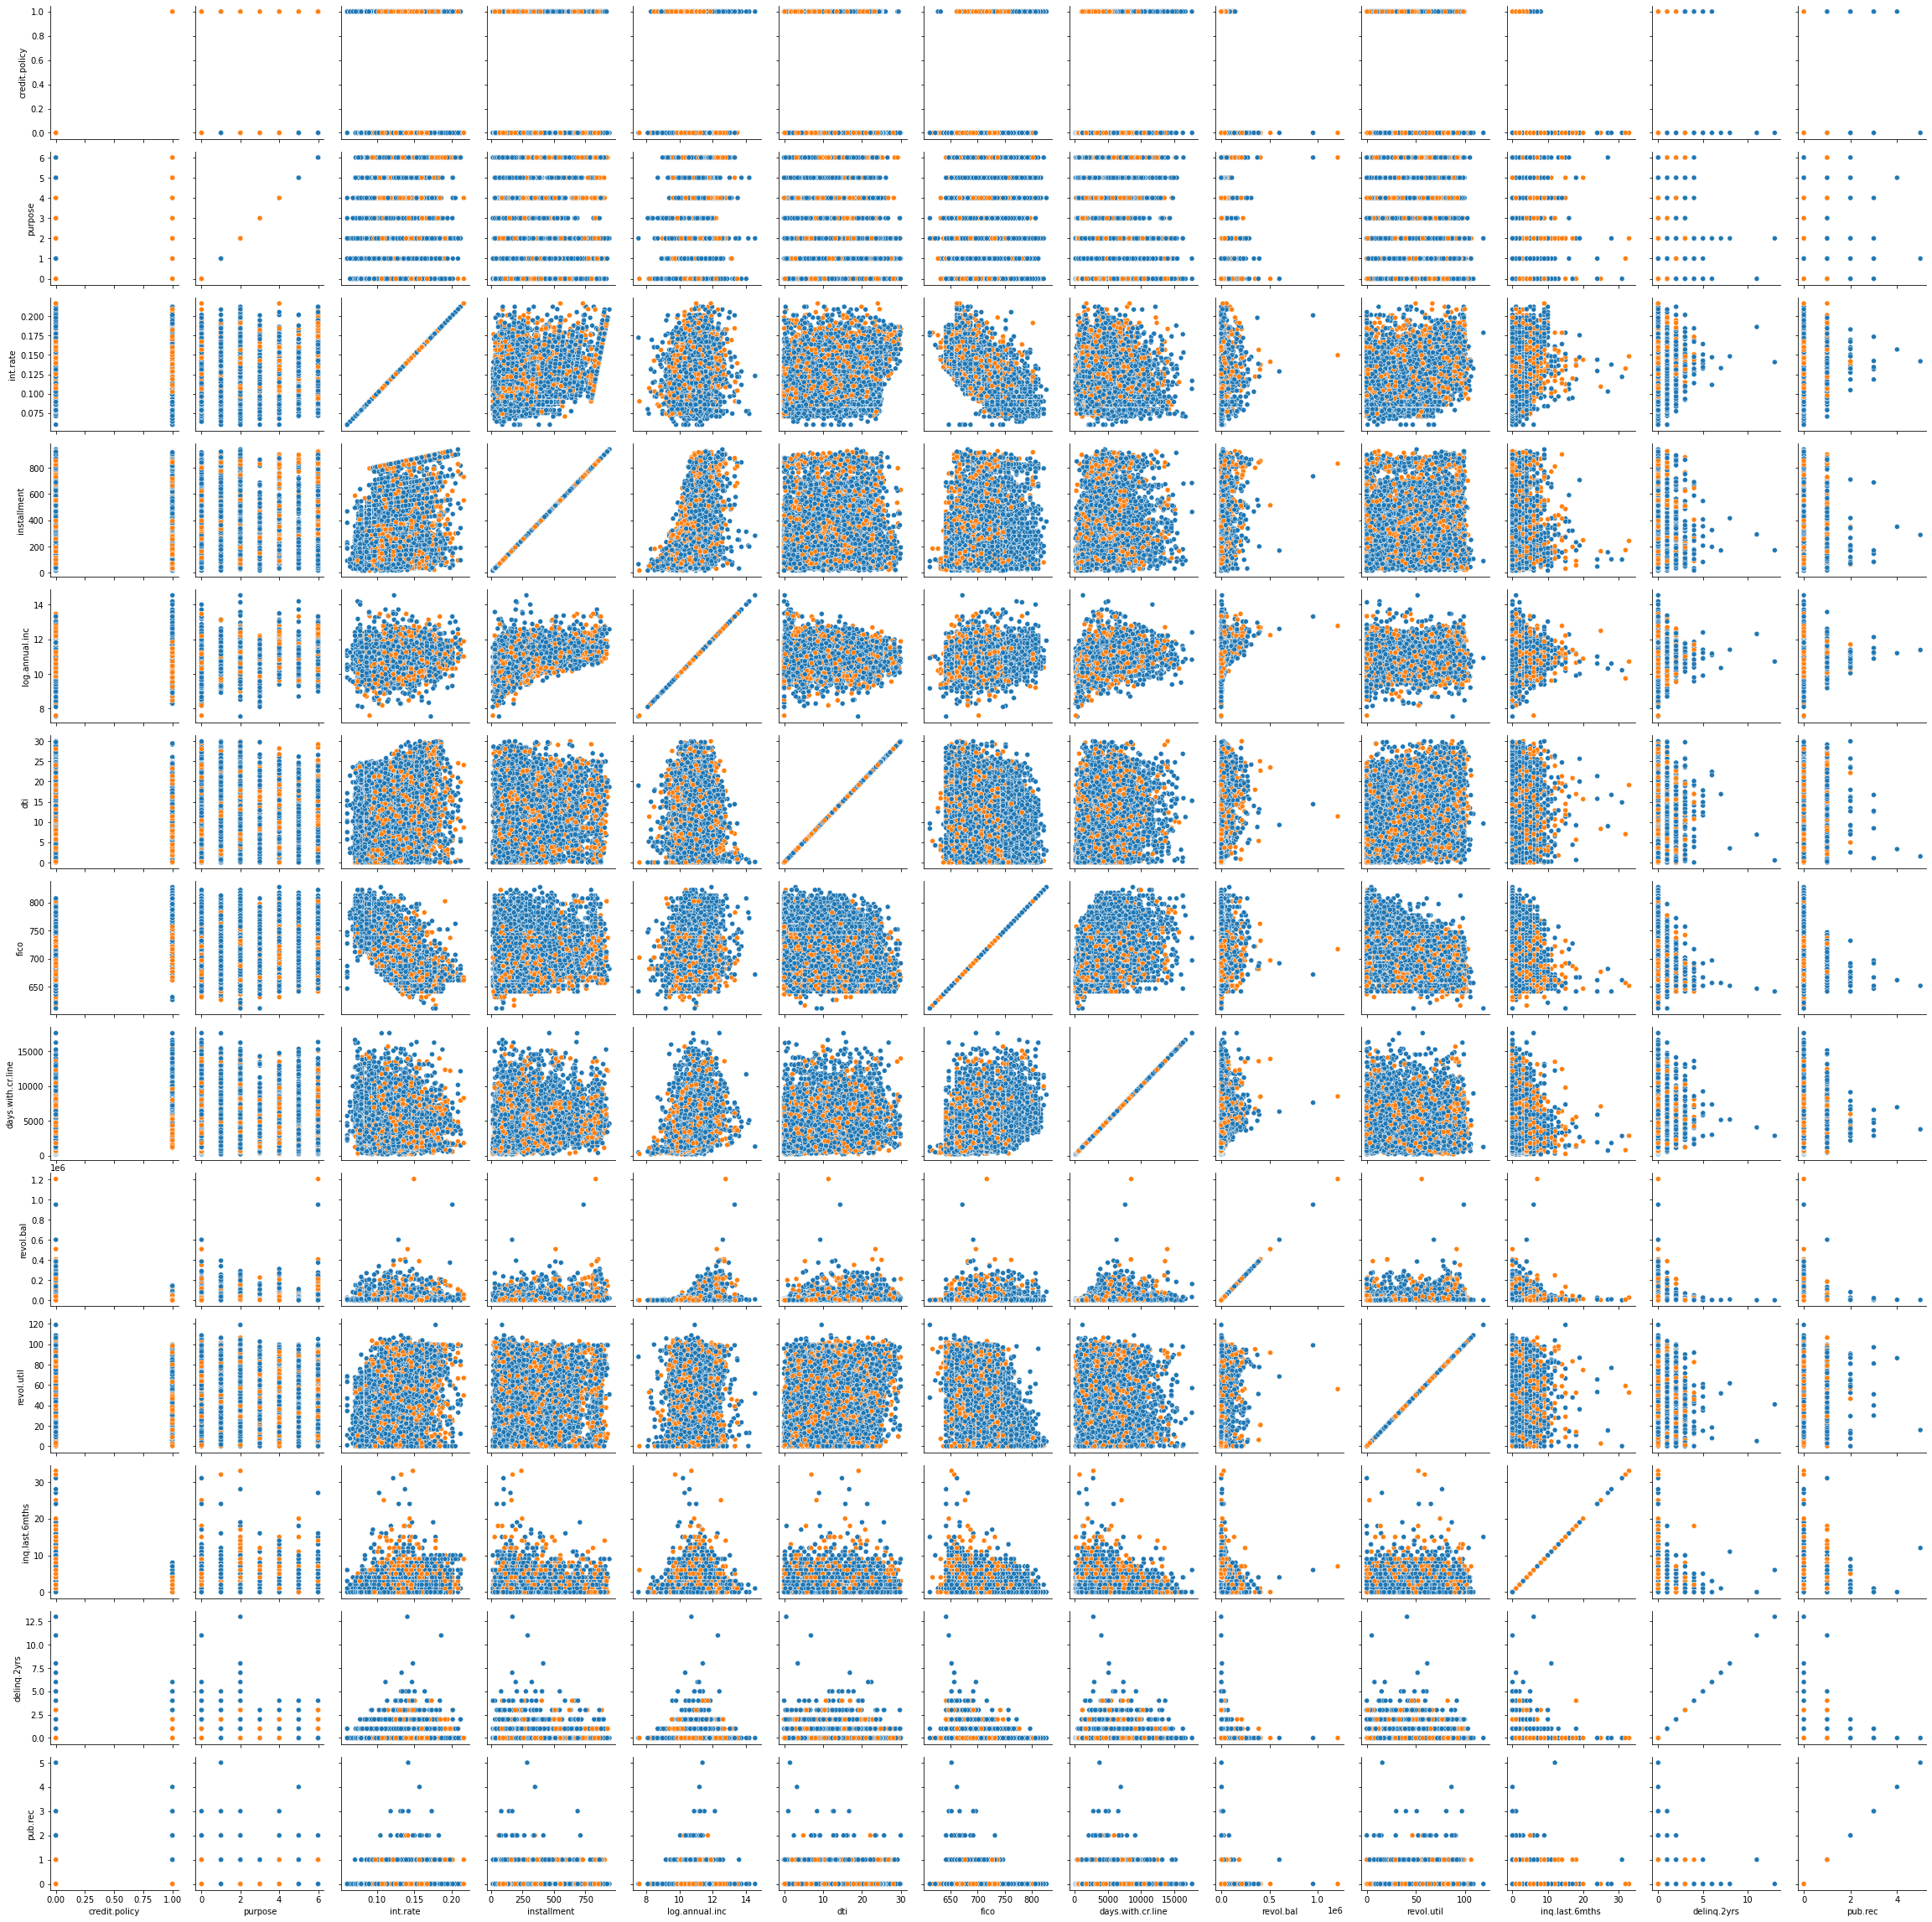

In [ ]:
g = sns.PairGrid(df,hue="not.fully.paid")
g.map(sns.scatterplot)

There is nothing much, we can conclude from this as it become hectic to visualize anything because of number of attributes.

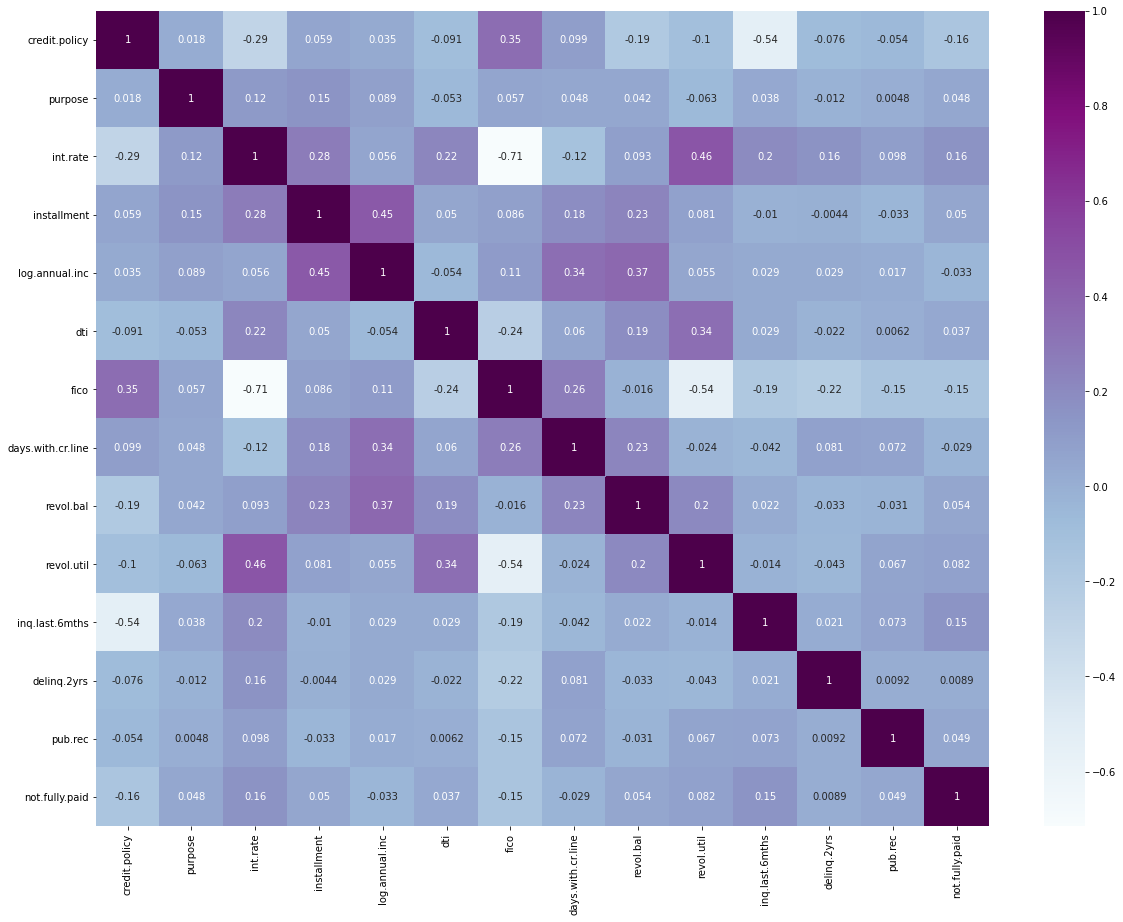

In [ ]:
plt.figure(figsize = (20, 15)) 
sns.heatmap(df.corr(), cmap='BuPu', annot=True)
plt.show()

We can see that **init rate, credit policy, fico and inq.last.6mths** has corresponding grater impact on target class(not.gully.paid)



### Train-Test Split

Splitting the dataset for training and testing purpose.

In [18]:
# Dropping target class

X = df.drop('not.fully.paid',axis=1)
y = df['not.fully.paid']

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

# Modellng

## Decision Tree

In [115]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
param_grid = {'max_depth': [2,3, 4,5,6,7,8,9,10,11,13,15,20]}

grid_search = GridSearchCV(dt_clf, param_grid, scoring = 'recall_weighted',cv=kFold, return_train_score=True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
     

In [116]:
grid_search.best_params_

{'max_depth': 2}

In [117]:
dt_clf = DecisionTreeClassifier(max_depth=2)
dt_clf.fit(X_train, y_train)
y_pred_train = dt_clf.predict(X_train)
y_pred_test = dt_clf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

In [118]:
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred_test))
print("\n")
print("<-------------------Classification Report---------------------->\n")
print(classification_report(y_test,y_pred_test))
print("\n")
print("<---------------Accuracy Scores------------------->\n")
print('Train Accuracy score: ',train_accuracy)
print('Test Accuracy score:',test_accuracy)

Confusion Matrix 
 [[2431    0]
 [ 443    0]]


<-------------------Classification Report---------------------->

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.00      0.00      0.00       443

    accuracy                           0.85      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.72      0.85      0.78      2874



<---------------Accuracy Scores------------------->

Train Accuracy score:  0.8374105011933174
Test Accuracy score: 0.8458594293667363


We got **Accuracy of 84.48%** using Decision Tree Classifier.

### **Bagging** with Decision Tree

In [119]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
scaler=StandardScaler()
X_scaled = scaler.fit_transform(X)
bag_dt = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),n_estimators=100,bootstrap=True)
score = cross_val_score(estimator=bag_dt, X=X_scaled, y=y, scoring='recall_weighted', cv=kFold, n_jobs=-1)
print('Mean score:', score.mean())

Mean score: 0.7310162599410215


Bagging is not improving the score of model and giving only **73.10% of mean Score.**

### **AdaBoosting** with Decision Tree

In [120]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_clf = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=2), learning_rate = 0.5)
adaboost_clf.fit(X_train, y_train)
print('Train score: {0:0.2f}'.format(adaboost_clf.score(X_train, y_train)))
print('Test score: {0:0.2f}'.format(adaboost_clf.score(X_test, y_test)))

Train score: 0.85
Test score: 0.84


It giving the same result and not improving our Model.

## Random Forest Classifier

In [122]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=600)
rf_clf.fit(X_train, y_train)
y_pred_train = rf_clf.predict(X_train)
y_pred_test = rf_clf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

In [123]:
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred_test))
print("\n")
print("<-------------------Classification Report---------------------->\n")
print(classification_report(y_test,y_pred_test))
print("\n")
print("<---------------Accuracy Scores------------------->\n")
#print('Train Accuracy score: ',train_accuracy)
print('Test Accuracy score:',test_accuracy)

Confusion Matrix 
 [[2421   10]
 [ 432   11]]


<-------------------Classification Report---------------------->

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.52      0.02      0.05       443

    accuracy                           0.85      2874
   macro avg       0.69      0.51      0.48      2874
weighted avg       0.80      0.85      0.78      2874



<---------------Accuracy Scores------------------->

Train Accuracy score:  1.0
Test Accuracy score: 0.8462073764787752


In [ ]:
bag_rf = BaggingClassifier(base_estimator=rf_clf, n_estimators=600,bootstrap_features=True)

score = cross_val_score(estimator=bag_rf, X=X_scaled, y=y, scoring='recall_weighted', cv=kFold, n_jobs=-1)
print('Mean score:', score.mean())